<a href="https://colab.research.google.com/github/KBVKarthik/Google-Colaboratory-Notebooks/blob/main/Text_Classification_with_Naive_Bayes%2C_Logistic_Regression%2C_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:


!pip install numpy==1.19.5
!pip install pandas==1.1.5
!pip install scikit-learn==0.21.3
!pip install matplotlib==3.2.2


     |████████████████████████████████| 14.8 MB 23.9 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
tensorflow 2.8.0 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 9.5 MB 8.3 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
     |████████████████████████████████| 6.7 MB 23.5 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.21.3 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.21.3 which is incompatible.


In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd # to work with csv files


import matplotlib as mpl 
import matplotlib.cm as cm 
import matplotlib.pyplot as plt 


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import stop_words


import string
import re


from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC


from sklearn.metrics import accuracy_score


from sklearn.metrics import confusion_matrix 
from sklearn import metrics


from time import time

In [2]:
try:
    from google.colab import files
    !wget -P DATAPATH https://raw.githubusercontent.com/practical-nlp/practical-nlp/master/Ch4/Data/Full-Economic-News-DFE-839861.csv
    !ls -lah DATAPATH
    our_data = pd.read_csv("DATAPATH/Full-Economic-News-DFE-839861.csv" , encoding = "ISO-8859-1" )

except ModuleNotFoundError:
    our_data = pd.read_csv("Data/Full-Economic-News-DFE-839861.csv" , encoding = "ISO-8859-1" )

--2022-03-14 09:31:29--  https://raw.githubusercontent.com/practical-nlp/practical-nlp/master/Ch4/Data/Full-Economic-News-DFE-839861.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12383529 (12M) [text/plain]
Saving to: ‘DATAPATH/Full-Economic-News-DFE-839861.csv.1’

Full-Economic-News- 100%[===================>]  11.81M  --.-KB/s    in 0.06s   

2022-03-14 09:31:29 (205 MB/s) - ‘DATAPATH/Full-Economic-News-DFE-839861.csv.1’ saved [12383529/12383529]

total 24M
drwxr-xr-x 2 root root 4.0K Mar 14 09:31 .
drwxr-xr-x 1 root root 4.0K Mar 14 09:28 ..
-rw-r--r-- 1 root root  12M Mar 14 09:28 Full-Economic-News-DFE-839861.csv
-rw-r--r-- 1 root root  12M Mar 14 09:31 Full-Economic-News-DFE-839861.csv.1


In [3]:
display(our_data.shape) 
our_data["relevance"].value_counts()/our_data.shape[0] 

(8000, 15)

no          0.821375
yes         0.177500
not sure    0.001125
Name: relevance, dtype: float64

In [4]:
our_data = our_data[our_data.relevance != "not sure"] 
our_data.shape
our_data['relevance'] = our_data.relevance.map({'yes':1, 'no':0}) 
our_data = our_data[["text","relevance"]] 
our_data.shape

(7991, 2)

In [5]:
stopwords = stop_words.ENGLISH_STOP_WORDS
def clean(doc): 
    doc = doc.replace("</br>", " ") 
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])
    doc = " ".join([token for token in doc.split() if token not in stopwords])
    
    return doc

In [6]:
import sklearn

from sklearn.model_selection import train_test_split


X = our_data.text 
y = our_data.relevance 
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7991,) (7991,)
(5993,) (5993,)
(1998,) (1998,)


In [7]:
vect = CountVectorizer(preprocessor=clean) 
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
print(X_train_dtm.shape, X_test_dtm.shape)

(5993, 49753) (1998, 49753)


In [8]:
nb = MultinomialNB() 
%time nb.fit(X_train_dtm, y_train) 
y_pred_class = nb.predict(X_test_dtm) 

CPU times: user 17.8 ms, sys: 0 ns, total: 17.8 ms
Wall time: 46.8 ms


Accuracy:  0.7822822822822822
ROC_AOC_Score:  0.7251117679464362


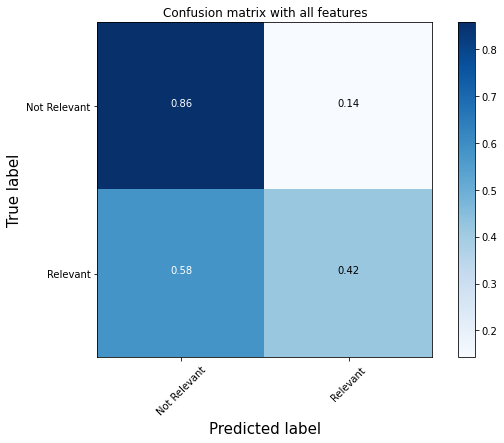

In [9]:
import itertools
from sklearn.metrics import roc_auc_score

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label',fontsize=15)
    plt.xlabel('Predicted label',fontsize=15)
    
    

print("Accuracy: ", accuracy_score(y_test, y_pred_class))

    

cnf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['Not Relevant','Relevant'],normalize=True,
                      title='Confusion matrix with all features')


y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]
print("ROC_AOC_Score: ", roc_auc_score(y_test, y_pred_prob))

CPU times: user 6.52 ms, sys: 0 ns, total: 6.52 ms
Wall time: 6.54 ms
Accuracy:  0.6876876876876877


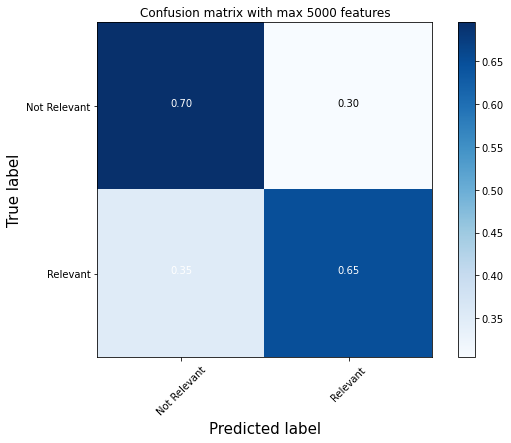

In [10]:
vect = CountVectorizer(preprocessor=clean, max_features=5000) 
X_train_dtm = vect.fit_transform(X_train) 
X_test_dtm = vect.transform(X_test)
nb = MultinomialNB() 
%time nb.fit(X_train_dtm, y_train) 
y_pred_class = nb.predict(X_test_dtm) 
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_class))

cnf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['Not Relevant','Relevant'],normalize=True,
                      title='Confusion matrix with max 5000 features')

Accuracy:  0.7377377377377378
AUC:  0.7251117679464362


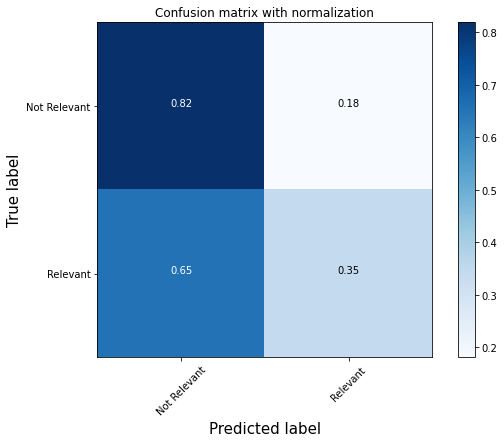

In [11]:
from sklearn.linear_model import LogisticRegression 

logreg = LogisticRegression(class_weight="balanced") 
logreg.fit(X_train_dtm, y_train) 


y_pred_class = logreg.predict(X_test_dtm)


print("Accuracy: ", accuracy_score(y_test, y_pred_class))
print("AUC: ", roc_auc_score(y_test, y_pred_prob))
cnf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['Not Relevant','Relevant'],normalize=True,
                      title='Confusion matrix with normalization')

Accuracy:  0.6786786786786787
AUC:  0.7251117679464362


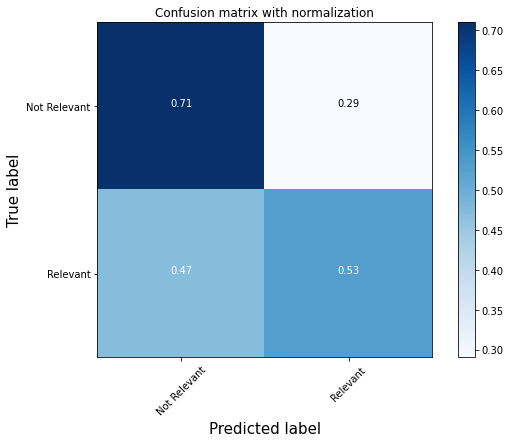

In [12]:
from sklearn.svm import LinearSVC

vect = CountVectorizer(preprocessor=clean, max_features=1000) 
X_train_dtm = vect.fit_transform(X_train) 
X_test_dtm = vect.transform(X_test)

classifier = LinearSVC(class_weight='balanced') 
classifier.fit(X_train_dtm, y_train)


y_pred_class = classifier.predict(X_test_dtm)


print("Accuracy: ", accuracy_score(y_test, y_pred_class))
print("AUC: ", roc_auc_score(y_test, y_pred_prob))
cnf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['Not Relevant','Relevant'],normalize=True,
                      title='Confusion matrix with normalization')